Análise exploratória geral das ocorrências de acidêntes no Brasil do ano de 2024

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from unidecode import unidecode
from pathlib import Path

In [11]:
# Função para listar os arquivos dentro do ZIP
def abrirZip(nome_zip):
    with zipfile.ZipFile(f'{nome_zip}.zip', 'r') as zip_ref:
        return zip_ref.namelist()  # Retorna a lista de arquivos no ZIP

# Função para ler um arquivo específico do ZIP
def lerArquivo(nome_zip, nome_arquivo):
    with zipfile.ZipFile(f'{nome_zip}.zip', 'r') as zip_ref:
        with zip_ref.open(nome_arquivo) as file:
            extensao = Path(nome_arquivo).suffix
            if extensao == '.csv':
                df = pd.read_csv(file, encoding='latin-1', sep=';')
            else:
                df=pd.read_excel(file)
    return df

In [5]:
dados = pd.read_csv('ocorrências_todos_estados.csv',sep=';')
dados.head(3)

,Identificador do acidente,Data,Dia da semana,Horário,Estado,BR,km,Município,Causa do acidente,Tipo do acidente,...,Fase do dia,Sentido da via,Condição do tempo,Tipo de pista,Traçado da via,uso_solo,Número de passageiros,Número de cavaleiro,Número de condutor,Número de pedestre
0,571772,2024-01-01,segunda-feira,00:05:00,RJ,101.0,272.5,TANGUA,Reação tardia ou ineficiente do condutor,Colisão com objeto,...,Plena Noite,Decrescente,Ensolarado,Dupla,Reta,Urbano,0,0,1,0
1,571774,2024-01-01,segunda-feira,00:05:00,GO,153.0,424.6,ANAPOLIS,Velocidade Incompatível,Colisão com objeto,...,Plena Noite,Decrescente,Ensolarado,Dupla,Reta,Rural,0,0,1,0
2,571777,2024-01-01,segunda-feira,01:45:00,ES,101.0,264.1,SERRA,Reação tardia ou ineficiente do condutor,Colisão com objeto,...,Plena Noite,Decrescente,Nublado,Múltipla,Reta;Interseção de Vias,Urbano,0,0,1,0


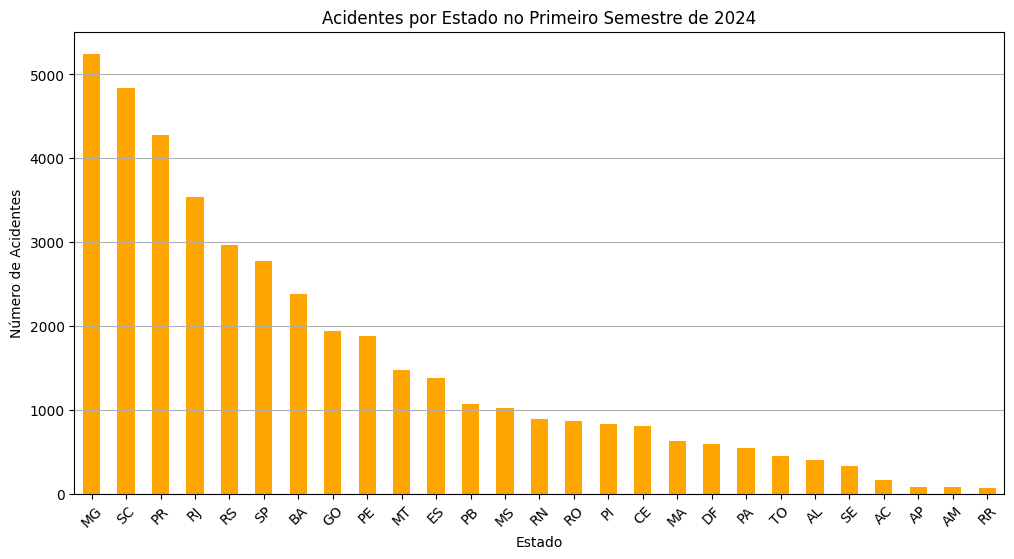

In [9]:
#Acidentes por estado no primeiro semestre de 2024
acidentes_por_estado = dados['Estado'].value_counts()
plt.figure(figsize=(12, 6))
acidentes_por_estado.plot(kind='bar', color='orange')
plt.title('Acidentes por Estado no Primeiro Semestre de 2024')
plt.xlabel('Estado')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [16]:
df_est = lerArquivo("população", 'estimativa_dou_2024.xlsx')
df_est.head(3)

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2024,Unnamed: 1
0,BRASIL E UNIDADES DA FEDERAÇÃO,POPULAÇÃO ESTIMADA
1,Brasil,212583750
2,Norte,18669345


In [17]:
df_est.columns = df_est.iloc[0]  
df_est = df_est[1:]              

df_est.reset_index(drop=True, inplace=True)

df_est.to_csv('tabela_corrigida.csv', index=False)

print(df_est)  

0                      BRASIL E UNIDADES DA FEDERAÇÃO POPULAÇÃO ESTIMADA
0                                              Brasil          212583750
1                                               Norte           18669345
2                                            Rondônia            1746227
3                                                Acre             880631
4                                            Amazonas            4281209
5                                             Roraima             716793
6                                                Pará            8664306
7                                               Amapá             802837
8                                           Tocantins            1577342
9                                            Nordeste           57112096
10                                           Maranhão            7010960
11                                              Piauí            3375646
12                                              Cea

In [18]:
estado_para_sigla = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraíba': 'PB',
    'Paraná': 'PR',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Santa Catarina': 'SC',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'São Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
}

# Transformar a coluna 'estado' em siglas
df_est['sigla_estado'] = df_est['BRASIL E UNIDADES DA FEDERAÇÃO'].map(estado_para_sigla)

# Se você quiser substituir a coluna original
# df['estado'] = df['estado'].map(estado_para_sigla)

# Salvar a tabela corrigida
df_est.to_csv('tabela_corrigida.csv', index=False)

print(df_est)  # Para verificar a tabela

0                      BRASIL E UNIDADES DA FEDERAÇÃO POPULAÇÃO ESTIMADA  \
0                                              Brasil          212583750   
1                                               Norte           18669345   
2                                            Rondônia            1746227   
3                                                Acre             880631   
4                                            Amazonas            4281209   
5                                             Roraima             716793   
6                                                Pará            8664306   
7                                               Amapá             802837   
8                                           Tocantins            1577342   
9                                            Nordeste           57112096   
10                                           Maranhão            7010960   
11                                              Piauí            3375646   
12          

In [19]:
df_unido2 = pd.merge(dados, df_est, left_on='Estado', right_on='sigla_estado', how='left')

   sigla_estado  numero_acidentes POPULAÇÃO ESTIMADA  \
0            AC               161             880631   
1            AL               402            3220104   
2            AM                84            4281209   
3            AP                84             802837   
4            BA              2377           14850513   
5            CE               804            9233656   
6            DF               599            2982818   
7            ES              1377            4102129   
8            GO              1945            7350483   
9            MA               627            7010960   
10           MG              5247           21322691   
11           MS              1025            2901895   
12           MT              1473            3836399   
13           PA               542            8664306   
14           PB              1074            4145040   
15           PE              1879            9539029   
16           PI               834            337

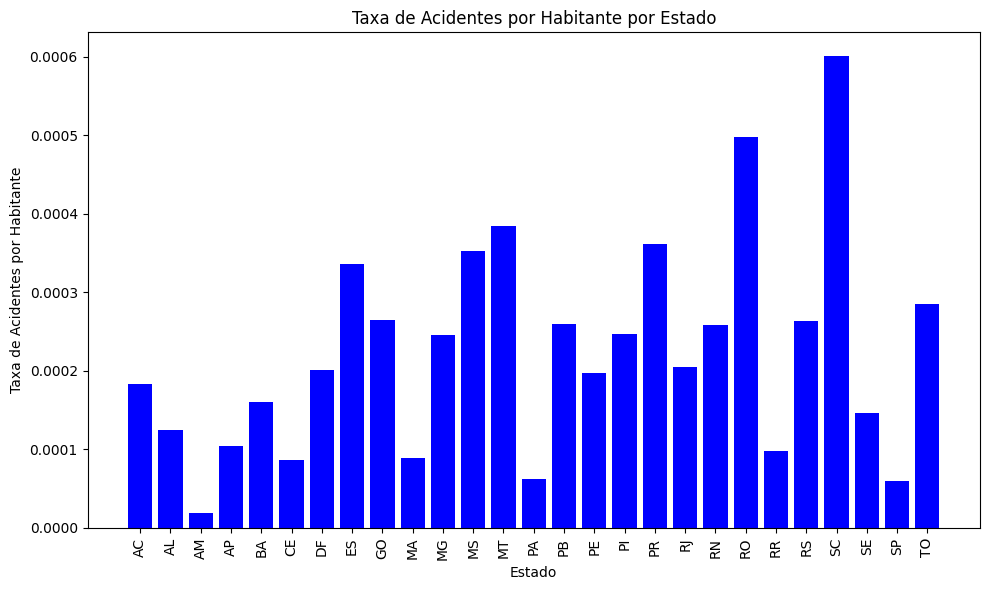

In [20]:
#Taxa de acidente por mês por habitante por Estado
acidentes_por_estado = df_unido2.groupby('sigla_estado').size().reset_index(name='numero_acidentes')

dados_estado = acidentes_por_estado.merge(df_unido2[['sigla_estado', 'POPULAÇÃO ESTIMADA']].drop_duplicates(), on='sigla_estado')

dados_estado['taxa_acidentes_por_habitante'] = dados_estado['numero_acidentes'] / dados_estado['POPULAÇÃO ESTIMADA']

print(dados_estado)

plt.figure(figsize=(10, 6))
plt.bar(dados_estado['sigla_estado'], dados_estado['taxa_acidentes_por_habitante'], color='blue')
plt.xlabel('Estado')
plt.ylabel('Taxa de Acidentes por Habitante')
plt.title('Taxa de Acidentes por Habitante por Estado')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

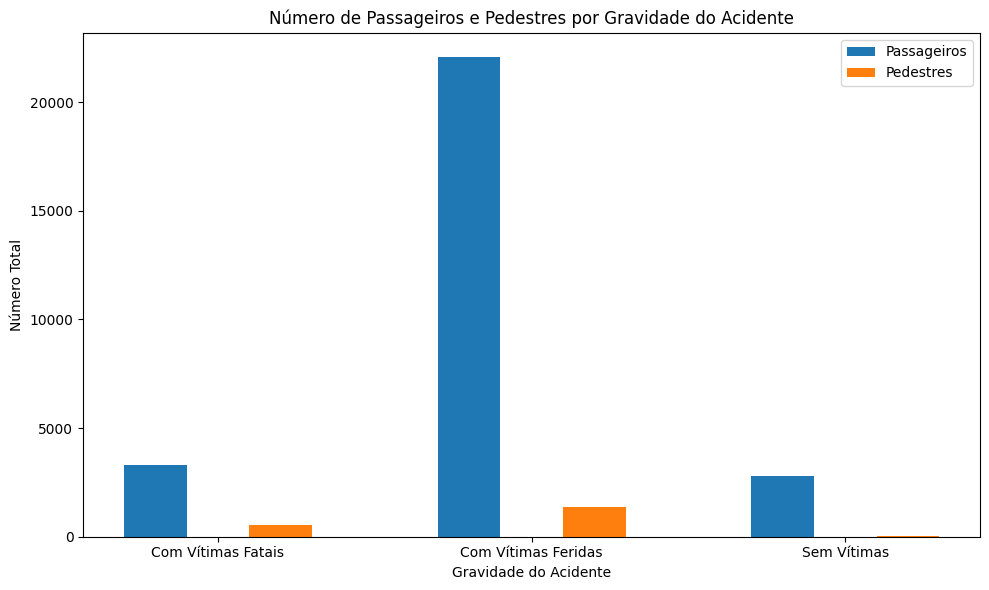

In [21]:
grouped = df_unido2.groupby('Gravidade do acidente').agg(
    total_acidentes=('Identificador do acidente', 'nunique'),
    total_passageiros=('Número de passageiros', 'sum'),
    total_pedestres=('Número de pedestre', 'sum')
).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
x = range(len(grouped))

ax.bar(x, grouped['total_passageiros'], width=bar_width, label='Passageiros', align='center')
ax.bar([p + bar_width * 2 for p in x], grouped['total_pedestres'], width=bar_width, label='Pedestres', align='center')

ax.set_xlabel('Gravidade do Acidente')
ax.set_ylabel('Número Total')
ax.set_title('Número de Passageiros e Pedestres por Gravidade do Acidente')
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(grouped['Gravidade do acidente'])
ax.legend()

plt.tight_layout()
plt.show()

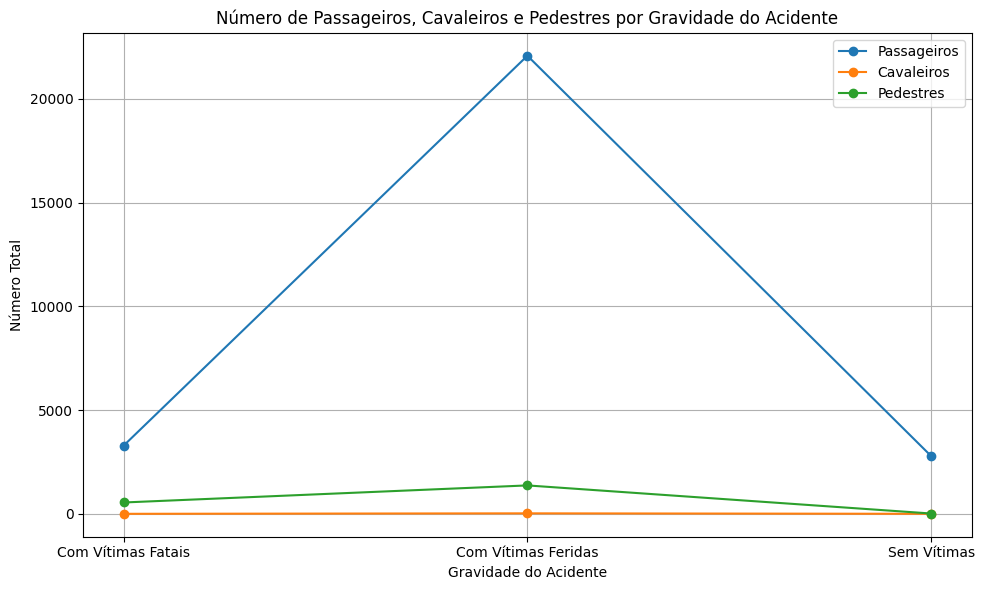

In [22]:
grouped = df_unido2.groupby('Gravidade do acidente').agg(
    total_acidentes=('Identificador do acidente', 'nunique'),
    total_passageiros=('Número de passageiros', 'sum'),
    total_cavaleiros=('Número de cavaleiro', 'sum'),
    total_pedestres=('Número de pedestre', 'sum')
).reset_index()

plt.figure(figsize=(10, 6))

plt.plot(grouped['Gravidade do acidente'], grouped['total_passageiros'], marker='o', label='Passageiros')
plt.plot(grouped['Gravidade do acidente'], grouped['total_cavaleiros'], marker='o', label='Cavaleiros')
plt.plot(grouped['Gravidade do acidente'], grouped['total_pedestres'], marker='o', label='Pedestres')

plt.xlabel('Gravidade do Acidente')
plt.ylabel('Número Total')
plt.title('Número de Passageiros, Cavaleiros e Pedestres por Gravidade do Acidente')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()